In [1]:
import seaborn as sns

from casual_inference.dataset import create_sample_ab_result
from casual_inference.evaluator import ABTestEvaluator

In [2]:
data = create_sample_ab_result(n_variant=3, sample_size=1000000, simulated_lift=[-0.01, 0.01])
data.head()

,rand_unit,variant,metric_bin,metric_cont
0,0,3,0,1
1,1,2,0,2
2,2,1,0,0
3,3,3,0,1
4,4,1,0,0


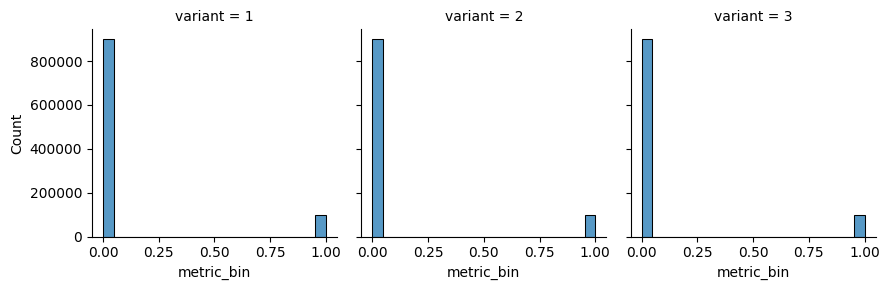

In [3]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_bin")

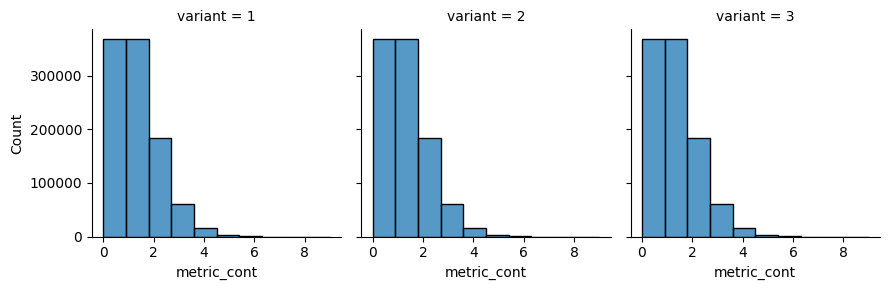

In [4]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_cont", bins=10)

In [5]:
evaluator = ABTestEvaluator()
evaluator.evaluate(
    data=data,
    unit_col="rand_unit",
    variant_col="variant",
    metrics=["metric_bin", "metric_cont"]
)

In [6]:
evaluator.summary_table()

,variant,metric,mean,var,count,std,stderr,abs_diff_mean,abs_diff_std,rel_diff_mean,rel_diff_std,t_value,dof,p_value,significance,ci_abs_diff,ci_rel_diff
0,1,metric_bin,0.100276,0.090221,333250,0.300368,0.000520,0.000000,0.000736,0.000000,0.007338,0.000000,666498.000000,1.000000e+00,unclear,"(-0.001442224059945651, 0.001442224059945651)","(-0.014382534876765964, 0.014382534876765964)"
1,2,metric_bin,0.099286,0.089428,333432,0.299046,0.000518,-0.000990,0.000734,-0.009877,0.007285,-1.349172,666663.605354,1.772823e-01,unclear,"(-0.002429314283574553, 0.0004483991670821816)","(-0.02415524089835371, 0.004400626104354172)"
2,3,metric_bin,0.101558,0.091244,333318,0.302066,0.000523,0.001282,0.000738,0.012781,0.007405,1.736858,666546.324761,8.241273e-02,unclear,"(-0.0001646294829468519, 0.0027278347542302774)","(-0.001733710067204441, 0.02729519543857837)"
3,1,metric_cont,0.998989,0.998907,333250,0.999453,0.001731,0.000000,0.002448,0.000000,0.002451,0.000000,666498.000000,1.000000e+00,unclear,"(-0.0047988951558483916, 0.0047988951558483916)","(-0.004803752964547724, 0.004803752964547724)"
4,2,metric_cont,0.990142,0.987013,333432,0.993485,0.001721,-0.008847,0.002441,-0.008856,0.002432,-3.624523,666651.528108,2.895170e-04,down,"(-0.01363076872578878, -0.004062889663256018)","(-0.013623276988404784, -0.004088292274883757)"
5,3,metric_cont,1.011644,1.010581,333318,1.005277,0.001741,0.012655,0.002455,0.012668,0.002473,5.153705,666545.055775,2.554619e-07,up,"(0.007842139378718214, 0.017467437452963787)","(0.00781964271475638, 0.017515554406287215)"


In [7]:
evaluator.summary_barplot()

![eval_result](images/plot_abtestevaluator_result.png)